<a href="https://colab.research.google.com/github/mkhetan/ph2_session2/blob/master/EVA_P2S2_File_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import SimpleRNN


from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.datasets import imdb
from keras.preprocessing import sequence
# 10000 uniqe words
max_features = 10000

# One entry - max 500 words
maxlen = 500

# 32 reviews in one go
#batch_size = 32
print('Loading data...')

Using TensorFlow backend.


Loading data...


In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

25000 train sequences
25000 test sequences
Pad sequences (samples x time)


All entries are now made fixed length 500 words... 25000 such entries in both train and test dataset

In [0]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)

input_train shape: (25000, 500)


In [0]:
from keras.layers import Dense, BatchNormalization, Dropout, Activation

model = Sequential()

# Embedding with max words 10000 and 32 dimentionality
# no input length???
model.add(Embedding(max_features, 32))

# RNN cell has 32 units ...
# Embedding layer is throwing out an output of length 32 that is being fed to this RNN
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(64))

#model.add(BatchNormalization())

#this activation improves the val accuracy to 85% :-)
model.add(Activation('relu'))
#model.add(Dropout(0.25))

# Fully connected layer - deciding what is the sentiment of the input sentence / review (positive or negative)
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Try adam - did not make much difference
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                6208      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


Gives a good test accuracy and decent validation accuracy

loss: 0.0307 - acc: 0.9904 - val_loss: 0.6185 - val_acc: 0.8200


In [0]:
# Batch size is 128 - means - 128 reviews in one shot....
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
# reducing batch size to 32 reduced the val accuracy
# increasing to 256 also gave worse results... 
# 64 was not much different...
#history = model.fit(input_train, y_train,
#                    epochs=10,
#                    batch_size=32,
#                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6697 - acc: 0.5806 - val_loss: 0.5672 - val_acc: 0.7372
Epoch 2/10
20000/20000 [==============================] - 20s 981us/step - loss: 0.4556 - acc: 0.8090 - val_loss: 0.3931 - val_acc: 0.8400
Epoch 3/10
20000/20000 [==============================] - 20s 990us/step - loss: 0.3311 - acc: 0.8693 - val_loss: 0.3807 - val_acc: 0.8324
Epoch 4/10
20000/20000 [==============================] - 20s 982us/step - loss: 0.2710 - acc: 0.8962 - val_loss: 0.3457 - val_acc: 0.8594
Epoch 5/10
20000/20000 [==============================] - 20s 984us/step - loss: 0.2353 - acc: 0.9108 - val_loss: 0.3710 - val_acc: 0.8392
Epoch 6/10
20000/20000 [==============================] - 20s 986us/step - loss: 0.1953 - acc: 0.9304 - val_loss: 0.4489 - val_acc: 0.7914
Epoch 7/10
20000/20000 [==============================] - 20s 990us/step - loss: 0.1654 - acc: 0.9412 - val_loss: 0.371

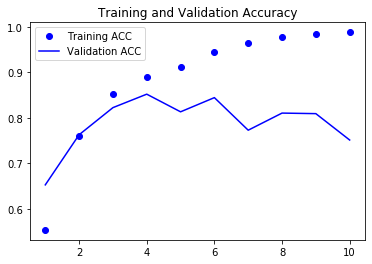

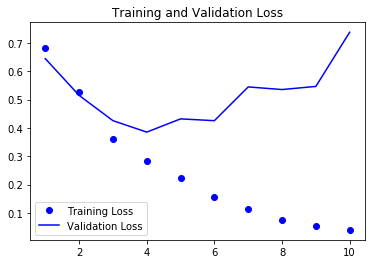

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()